In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Data Preparation

Importing the data into the notebook

In [2]:
df = pd.read_csv('df_with_latlong.csv')

Doing the following cleaning of the data

1. Separating the latlong column based on the ',' delimiter and creating a column for Latitude and Longitude.
2. Separating the month column based on the '-' delimiter and creating a column for month and year.
3. Converting Latitude and Longitude to float type and converting month and year to int64.

In [3]:
df[['Latitude', 'Longitude']] = df['LatLong'].str.split(',', expand=True)
df[['year', 'month']] = df['month'].str.split('-', expand=True)
df["Latitude"] = df["Latitude"].astype(float)
df["Longitude"] = df["Longitude"].astype(float)
df["year"] = df["year"].astype('int64')
df["month"] = df["month"].astype('int64')

Dropping columns that will not be used in the model. This is because their information is better represented by other variables in the data.

In [4]:
df = df.drop(["block", "street_name", "storey_range", "lease_commence_date", "LatLong", "Address", "Postal code"], axis = 1)

In [5]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,nearest MRT,distance to nearest MRT,schools within 1km,nearest mall,mall nearest distance,mall within 500m,mall within 1km,hawkers within 1km,travel time to RP in minutes,Latitude,Longitude,year
0,1,ANG MO KIO,2 ROOM,44.0,Improved,61,232000.0,Ang Mo Kio,1.007304,3,AMK Hub,0.997504,0,1,3,40,1.362005,103.853880,2017
1,1,ANG MO KIO,3 ROOM,67.0,New Generation,60,250000.0,Ang Mo Kio,1.271398,7,Broadway Plaza,0.868861,0,1,4,44,1.370966,103.838202,2017
2,1,ANG MO KIO,3 ROOM,67.0,New Generation,62,262000.0,Yio Chu Kang,1.069720,6,Broadway Plaza,1.525573,0,0,2,50,1.380709,103.835368,2017
3,1,ANG MO KIO,3 ROOM,68.0,New Generation,62,265000.0,Ang Mo Kio,0.946884,3,myVillage At Serangoon Garden,0.893796,0,1,3,43,1.366201,103.857201,2017
4,1,ANG MO KIO,3 ROOM,67.0,New Generation,62,265000.0,Yio Chu Kang,1.092577,5,Broadway Plaza,1.569307,0,0,2,47,1.381041,103.835132,2017


# Label Encoding

In order to use the categorical variables in machine learning, there is a need to convert categorical data into numeric data. Based on the data, there are too many unique values some columns, hence we chose to use label encoding instead of one-hot encoding.

We first create a list for each column containing the unique values.

In [6]:
towns = df["town"].unique()
flat_types = df["flat_type"].unique()
flat_models = df["flat_model"].unique()
nearest_MRTs = df["nearest MRT"].unique()
nearest_malls = df["nearest mall"].unique()

Next, I have created a function that can sort the lists in alphabetical order based on the specified number of characters.

In [7]:
def list_sorter(lst, n):
    lst = sorted(lst, key=lambda x: x[:n])
    return lst

In [8]:
sorted_towns = list_sorter(towns,10)
sorted_flat_types = list_sorter(flat_types,10)
sorted_flat_models = list_sorter(flat_models,10)
sorted_nearest_MRTs = list_sorter(nearest_MRTs,10)
sorted_nearest_malls = list_sorter(nearest_malls,10)

The function below takes the list and creates a dictionary with the elements of the list as the keys and the index of the element as the value. These numbers will act as the encoded value that will be used in the model.

In [9]:
def dictionary_maker(lst):
    dct = {lst[i]: i for i in range(len(lst))}
    return dct

In [10]:
towns_dct = dictionary_maker(sorted_towns)
flat_types_dct = dictionary_maker(sorted_flat_types)
flat_models_dct = dictionary_maker(sorted_flat_models)
nearest_MRT_dct = dictionary_maker(sorted_nearest_MRTs)
nearest_mall_dct = dictionary_maker(sorted_nearest_malls)

The function below takes in the dataframe, column and the respective dictionary of the column and replaces the values in the dataframe with respective label value from the dictionary.

In [11]:
def Encoder(df, column, dct):
    for index, row in df.iterrows():
        if row[column] in dct:
            df.at[index, column] = dct[row[column]]

In [12]:
Encoder(df, "town", towns_dct)
Encoder(df, "flat_type", flat_types_dct)
Encoder(df, "flat_model", flat_models_dct)
Encoder(df, "nearest MRT", nearest_MRT_dct)
Encoder(df, "nearest mall", nearest_mall_dct)

In [13]:
df.head()

,month,town,flat_type,floor_area_sqm,flat_model,remaining_lease,resale_price,nearest MRT,distance to nearest MRT,schools within 1km,nearest mall,mall nearest distance,mall within 500m,mall within 1km,hawkers within 1km,travel time to RP in minutes,Latitude,Longitude,year
0,1,0,1,44.0,5,61,232000.0,1,1.007304,3,3,0.997504,0,1,3,40,1.362005,103.853880,2017
1,1,0,2,67.0,12,60,250000.0,1,1.271398,7,13,0.868861,0,1,4,44,1.370966,103.838202,2017
2,1,0,2,67.0,12,62,262000.0,122,1.069720,6,13,1.525573,0,0,2,50,1.380709,103.835368,2017
3,1,0,2,68.0,12,62,265000.0,1,0.946884,3,119,0.893796,0,1,3,43,1.366201,103.857201,2017
4,1,0,2,67.0,12,62,265000.0,122,1.092577,5,13,1.569307,0,0,2,47,1.381041,103.835132,2017


Since the replaced values are still considered as type:object, we convert them to type int64 in the code below.

In [14]:
df["town"] = df["town"].astype('int64')
df["flat_type"] = df["flat_type"].astype('int64')
df["flat_model"] = df["flat_model"].astype('int64')
df["nearest MRT"] = df["nearest MRT"].astype('int64')
df["nearest mall"] = df["nearest mall"].astype('int64')

After all the preparation and label encoding, the data is now ready to be used in the model. All the data is of type Int or type Float which can be interpreted by the model.

# Gradient Boosted Regression Tree Model

Since our goal is to predict the resale price of HDBs which is a continuous variable, it is a regression problem. However, due to the presence of label encoded categorical variables, linear regression models may not be the best option. Hence we have chosen to use a Gradient Boosted Regression Tree Model.

To determine the accuracy of the model, we have calculated the Root-Mean-Square-Value(rmse), R-squared score(r2) and Explained Variance Score(evs).

In [15]:
%%time
# Importing the necessary libraries
# !pip install xgboost if library does not work automatically
from sklearn.preprocessing import StandardScaler 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, explained_variance_score

# Separate predictors and response variable
X = df.drop(["resale_price"], axis=1)
y = df["resale_price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Define XGBoost model
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=69)

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on testing data
y_pred = model.predict(X_test)

# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score:", evs)

RMSE: 34310.838976121944
R-squared score: 0.9570449612096793
Explained Variance Score: 0.957045817097566
Wall time: 6.49 s


We can see that the model is quite good as it has a low RMSE, and a R-squared score and Explained Variance Score of around 0.957. This means that the difference between the actual and predicted values is small and the model is a good fit.

To better understand which variables are the most useful in predicting the resale price, the graph below illustrates the importance of each feature.

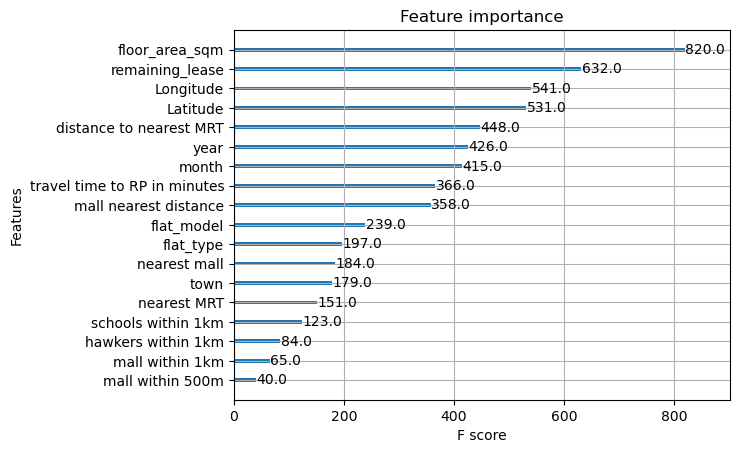

In [16]:
xgb.plot_importance(model)
plt.show()

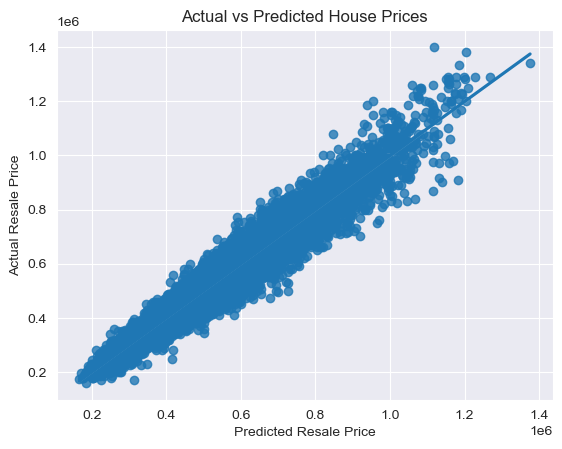

In [17]:
sb.set_style("darkgrid")
sb.regplot(x=y_pred, y=y_test)
plt.xlabel('Predicted Resale Price')
plt.ylabel('Actual Resale Price')
plt.title("Actual vs Predicted House Prices")
plt.show()

# Hyperparameter Tuning

In this section, we attempt to improve the model by tuning the model's hyperparameters. Similar to the other models, we have chosen to use RandomSearchCV and GridSearchCV. Both will attempt to find the best parameters to use for the model based on the model's accuracy.

In [18]:
%%time
#RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, explained_variance_score

# Create XGBoost model
xgb_model_random = xgb.XGBRegressor(silent=True)

# specify the hyperparameter space
params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200],
    'gamma': [0.1, 0.5, 1.0]
}

# create an instance of RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=xgb_model_random,
    param_distributions=params,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=69,
    n_jobs=-1,
    verbose=0
)

# fit the model with early stopping
rs.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(X_test, y_test)])

# get the best hyperparameters
print("best parameters", rs.best_params_)

# get the best model
random_search_best_model = rs.best_estimator_

# predict on the test set
random_search_y_pred = random_search_best_model.predict(X_test)

# evaluate the model
random_search_rmse = mean_squared_error(y_test, random_search_y_pred, squared=False)
print('Test RMSE:', random_search_rmse)

# calculate R-squared score
random_search_r2 = r2_score(y_test, random_search_y_pred)
print("R-squared score:", random_search_r2)

# calculate Explained Variance Score
random_search_evs = explained_variance_score(y_test, random_search_y_pred)
print("Explained Variance Score:", random_search_evs)

[22:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	validation_0-rmse:262216.70405
[1]	validation_0-rmse:144783.80728
[2]	validation_0-rmse:90851.37189


C:\Users\Ajay\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Ajay\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:67866.83046
[4]	validation_0-rmse:59251.46990
[5]	validation_0-rmse:55186.76735
[6]	validation_0-rmse:53012.81952
[7]	validation_0-rmse:51398.37369
[8]	validation_0-rmse:50256.32819
[9]	validation_0-rmse:48888.70363
[10]	validation_0-rmse:48157.24064
[11]	validation_0-rmse:47295.11493
[12]	validation_0-rmse:46914.06791
[13]	validation_0-rmse:46564.48963
[14]	validation_0-rmse:45663.10810
[15]	validation_0-rmse:44333.26621
[16]	validation_0-rmse:44069.25534
[17]	validation_0-rmse:43543.14642
[18]	validation_0-rmse:42927.00695
[19]	validation_0-rmse:42774.44513
[20]	validation_0-rmse:42373.74098
[21]	validation_0-rmse:41976.60238
[22]	validation_0-rmse:41800.85442
[23]	validation_0-rmse:41670.62906
[24]	validation_0-rmse:41310.65525
[25]	validation_0-rmse:40896.11772
[26]	validation_0-rmse:40626.63998
[27]	validation_0-rmse:40447.78736
[28]	validation_0-rmse:40265.53783
[29]	validation_0-rmse:40039.43211
[30]	validation_0-rmse:39933.84101
[31]	validation_0-rmse:3988

We can see from the results of using RandomSearchCV helped to reduce RMSE slightly and increase R-squared score and Explained Variance Score.

In [19]:
%%time
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, explained_variance_score

# Create XGBoost model
xgb_model_grid = xgb.XGBRegressor()

# define the parameter grid to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# define the grid search object
grid_search = GridSearchCV(estimator=xgb_model_grid, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# evaluate the performance of the best model on the test set
grid_search_best_model = grid_search.best_estimator_
grid_search_y_pred = grid_search_best_model.predict(X_test)
grid_search_rmse = mean_squared_error(y_test, grid_search_y_pred, squared=False)
print("RMSE on test set: ", grid_search_rmse)

# calculate R-squared score
grid_search_r2 = r2_score(y_test, grid_search_y_pred)
print("R-squared score:", grid_search_r2)

# calculate Explained Variance Score
grid_search_evs = explained_variance_score(y_test, grid_search_y_pred)
print("Explained Variance Score:", grid_search_evs)

Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300, 'subsample': 1.0}
RMSE on test set:  32415.627771488344
R-squared score: 0.961659275634934
Explained Variance Score: 0.9616603229276902
Wall time: 5h 33min 25s


Below we can see the updated regressionplot of actual vs predicted values using the hyperparameter tuned GBRT model.

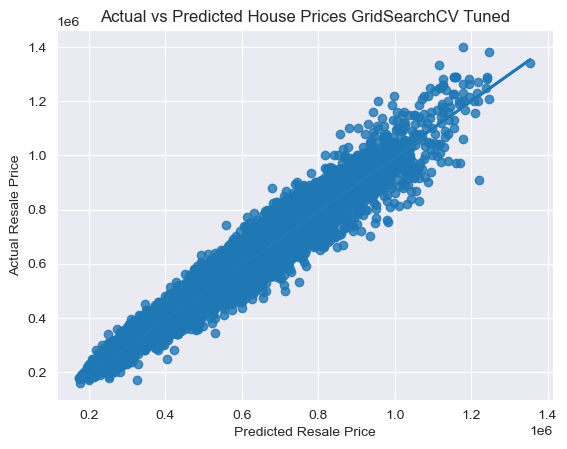

In [20]:
sb.set_style("darkgrid")
sb.regplot(x=grid_search_y_pred, y=y_test)
plt.xlabel('Predicted Resale Price')
plt.ylabel('Actual Resale Price')
plt.title("Actual vs Predicted House Prices GridSearchCV Tuned")
plt.show()

Here we can see that in the Hyperparameter Tuned GBRT model, the order of importance of the varibles has changed slightly. The top 3 are now the month in which the flat was sold, the remaining lease of the flat followed by the floor area of the flat.

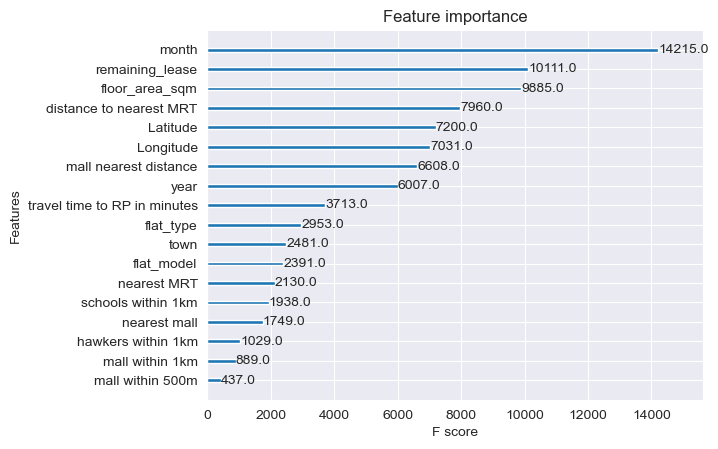

In [21]:
xgb.plot_importance(grid_search_best_model)
plt.show()

Based on the results of GridSearchCV we can see that there is a greater reduction in RMSE and a greater increase in R-squared score and Explained Variance Score as compared to RandomSearchCV. This was expected due to the nature of GridSearchCV as it evaluates all the possible combinations of hyperparameters as compared to RandomSearchCV. Consequently, we can see the huge disparity in time taken for RandomSearchCV *(4min 51s)* as compared to GridSearchCV *(5h 44min 35s)*. This difference only brought about a slightly better model, thus for future purposes, perhaps RandomSearchCV might be sufficient.

In the code below, I am saving the model made using the best hyperparameters obtained from GridSearchCV. This will allow me to reuse the model without having to train it again.

In [22]:
import pickle

# Saving the model using the pickle library.
with open('GBRT_GridSearchCV_model.pkl', 'wb') as f:
    pickle.dump(grid_search_best_model, f)

# Predicting Future Resale Prices

As we were doing this project, newer data on HDB resale prices for the month of April 2023 was released on data.gov.sg. Hence, we decided to tese the efficacy of our model in predicting resale prices of HDBs that took place beyond its training data. This could also provide insights into how robust our model will be when dealing with more data in the future.

It generally follows the same steps cleaning the data, and label encoding the categorial variables.

In [23]:
new_df = pd.read_csv('AprilDataProcessed.csv')

In [24]:
new_df[['year', 'month']] = new_df['month'].str.split('-', expand=True)
new_df["year"] = new_df["year"].astype('int64')
new_df["month"] = new_df["month"].astype('int64')
new_df = new_df.drop(["block", "street_name", "storey_range", "lease_commence_date", "LatLong", "Address", "Postal code"], axis = 1)

In [25]:
Encoder(new_df, "town", towns_dct)
Encoder(new_df, "flat_type", flat_types_dct)
Encoder(new_df, "flat_model", flat_models_dct)
Encoder(new_df, "nearest MRT", nearest_MRT_dct)
Encoder(new_df, "nearest mall", nearest_mall_dct)

In [26]:
new_df["town"] = new_df["town"].astype('int64')
new_df["flat_type"] = new_df["flat_type"].astype('int64')
new_df["flat_model"] = new_df["flat_model"].astype('int64')
new_df["nearest MRT"] = new_df["nearest MRT"].astype('int64')
new_df["nearest mall"] = new_df["nearest mall"].astype('int64')

In the code below, we use the Gradient Boosted Regression Tree Model we created initially to predict resale prices of HDBs.

In [27]:
%%time
# Separate predictors and response variable
nX = new_df.drop(["resale_price"], axis=1)
ny = new_df["resale_price"]

# Make predictions on testing data
ny_pred = model.predict(nX)

# Evaluate model performance
rmse = mean_squared_error(ny, ny_pred, squared=False)
print("RMSE:", rmse)

# calculate R-squared score
r2 = r2_score(ny, ny_pred)
print("R-squared score:", r2)

# calculate Explained Variance Score
evs = explained_variance_score(ny, ny_pred)
print("Explained Variance Score:", evs)

RMSE: 41223.46087511551
R-squared score: 0.9439185066435111
Explained Variance Score: 0.9448778350653476
Wall time: 5.98 ms


In the code below, we use the model that has had its hyperparameters tuned using GridSearchCV to predict the resale price of HDBs in April 2023.

In [28]:
%%time
# Separate predictors and response variable
nX = new_df.drop(["resale_price"], axis=1)
ny = new_df["resale_price"]

# Make predictions on testing data
ny_pred_best = grid_search_best_model.predict(nX)

# Evaluate model performance
rmse = mean_squared_error(ny, ny_pred_best, squared=False)
print("RMSE:", rmse)

# calculate R-squared score
r2 = r2_score(ny, ny_pred_best)
print("R-squared score:", r2)

# calculate Explained Variance Score
evs = explained_variance_score(ny, ny_pred_best)
print("Explained Variance Score:", evs)

RMSE: 40165.30365544653
R-squared score: 0.9467606457189002
Explained Variance Score: 0.9479640192673161
Wall time: 12 ms


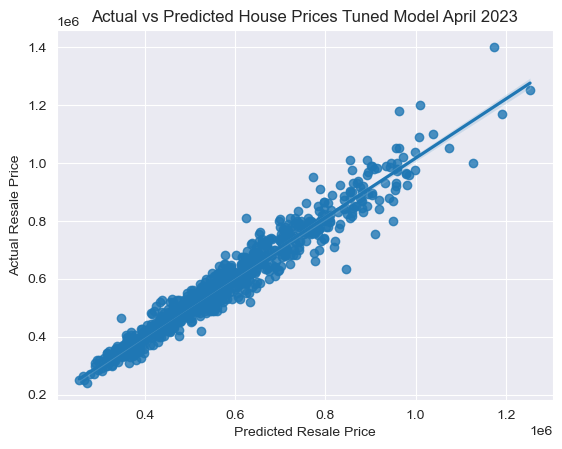

In [29]:
sb.set_style("darkgrid")
sb.regplot(x=ny_pred_best, y=ny)
plt.xlabel('Predicted Resale Price')
plt.ylabel('Actual Resale Price')
plt.title("Actual vs Predicted House Prices Tuned Model April 2023")
plt.show()

From the results, we can see that both models are quite robust in handling the April 2023 data. Unsurprisingly, the model that has been tuned using GridSearchCV performs better by achieving a lower RMSE and higher R-squared score and Explained Variance Score. 

# Conclusion

The Gradient Boosted Regression Tree Model is very good at predicting the resale prices of HDBs. All the models have a low RMSE and a R-squared, Explained Variance score very close to 1. The models are also very robust at handling future data. The best model is the one with we obtained after GridSearchCV .Thus we have chosen to use this model as the main one to address our problem statement.